In [16]:
from sklearn import datasets
import pandas as pd
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('content/winequality-white.csv', sep=";")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
for col in df.columns:
    unique_count = df[col].nunique()  # Получаем кол-вл уникальных значение для каждого столбца
    uniq_data = df[col].unique()  # Получаем массив уникальных значений для каждого столбца
    
    # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять поля типа id и вообще числа)
    is_numeric = pd.to_numeric(df[col], errors='coerce').notnull().all()
    
    if is_numeric:
        print(f"Столбец '{col}': уникальных значений {unique_count} - цифровые значения")
    else:
        print(f"Столбец '{col}': уникальных значений {unique_count} - {list(uniq_data[:5])}")

Столбец 'fixed acidity': уникальных значений 68 - цифровые значения
Столбец 'volatile acidity': уникальных значений 125 - цифровые значения
Столбец 'citric acid': уникальных значений 87 - цифровые значения
Столбец 'residual sugar': уникальных значений 310 - цифровые значения
Столбец 'chlorides': уникальных значений 160 - цифровые значения
Столбец 'free sulfur dioxide': уникальных значений 132 - цифровые значения
Столбец 'total sulfur dioxide': уникальных значений 251 - цифровые значения
Столбец 'density': уникальных значений 890 - цифровые значения
Столбец 'pH': уникальных значений 103 - цифровые значения
Столбец 'sulphates': уникальных значений 79 - цифровые значения
Столбец 'alcohol': уникальных значений 103 - цифровые значения
Столбец 'quality': уникальных значений 7 - цифровые значения


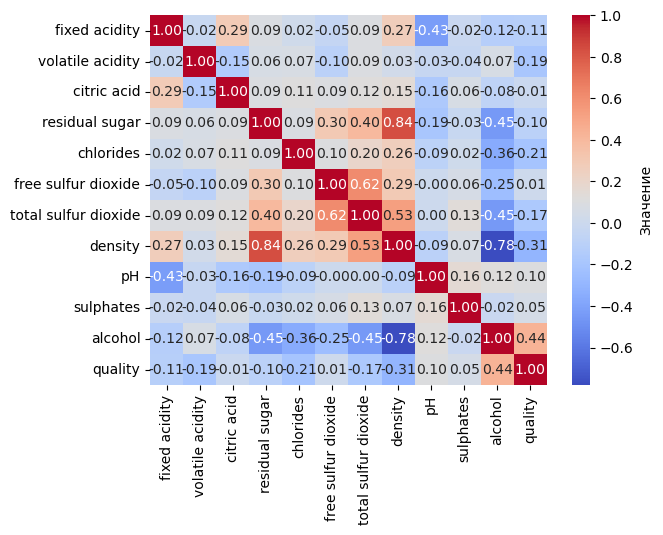

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

In [ ]:
X = df.drop(columns=["quality"])  # Удаляем столбец "target", оставляем только признаки
y = df["quality"]  # Целевая переменная

# Разбиваем на 80% тренировочных и 20% тестовых данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)